# Sound source localization with a microphones array : beamforming approaches

**Introduction:**

The practical work (PW) in question addresses the study of sound source localization using a linear array of microphones and the beamforming technique. The aim of this PW is to leverage the sound propagation properties to deduce the position of a sound source using various beamforming approaches. During this PW, students characterized the antenna's response in terms of directivity and angular resolution through a series of experiments involving pure signals at specific frequencies as well as white noise. The experiments were designed to test the effectiveness of beamforming in various scenarios, including the localization of static and moving sources, as well as its performance in ambient noise conditions.

You have characterized and analyzed the sound propagation in the previous practical. We will now
exploit theses properties to infer one sound source position w.r.t. a linear microphone array made
of $N=8$ omnidirectional MEMS microphones. The system you will be using is the same as before;
thus, most of the code you already wrote to acquire signals, plot them, etc. will remain the same.

In all the following, the acquisition system will work with a sampling frequency $F_s = 20$kHz, and with a buffer of size $\texttt{BLK} = 1024$.

In [1]:
#%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from client import array
import time

c:\Users\hp\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
# Use one or the other option ... not the two at the same time!
# antenne=array('server') # When performing real-time acquisition


In [2]:
antenne=array('play')   # When playing recorded files

In [4]:
# Load acquisition and array parameters from the antenne variable, after launching acquisition or play
Fs = antenne.fs
BLK = antenne.blocksize
N = len(antenne.mu32.mems)
d = antenne.interspace

### 1) To begin, start the acquisition of the audio system, and capture one audio buffer. Plot the resulting signals as a function of time.

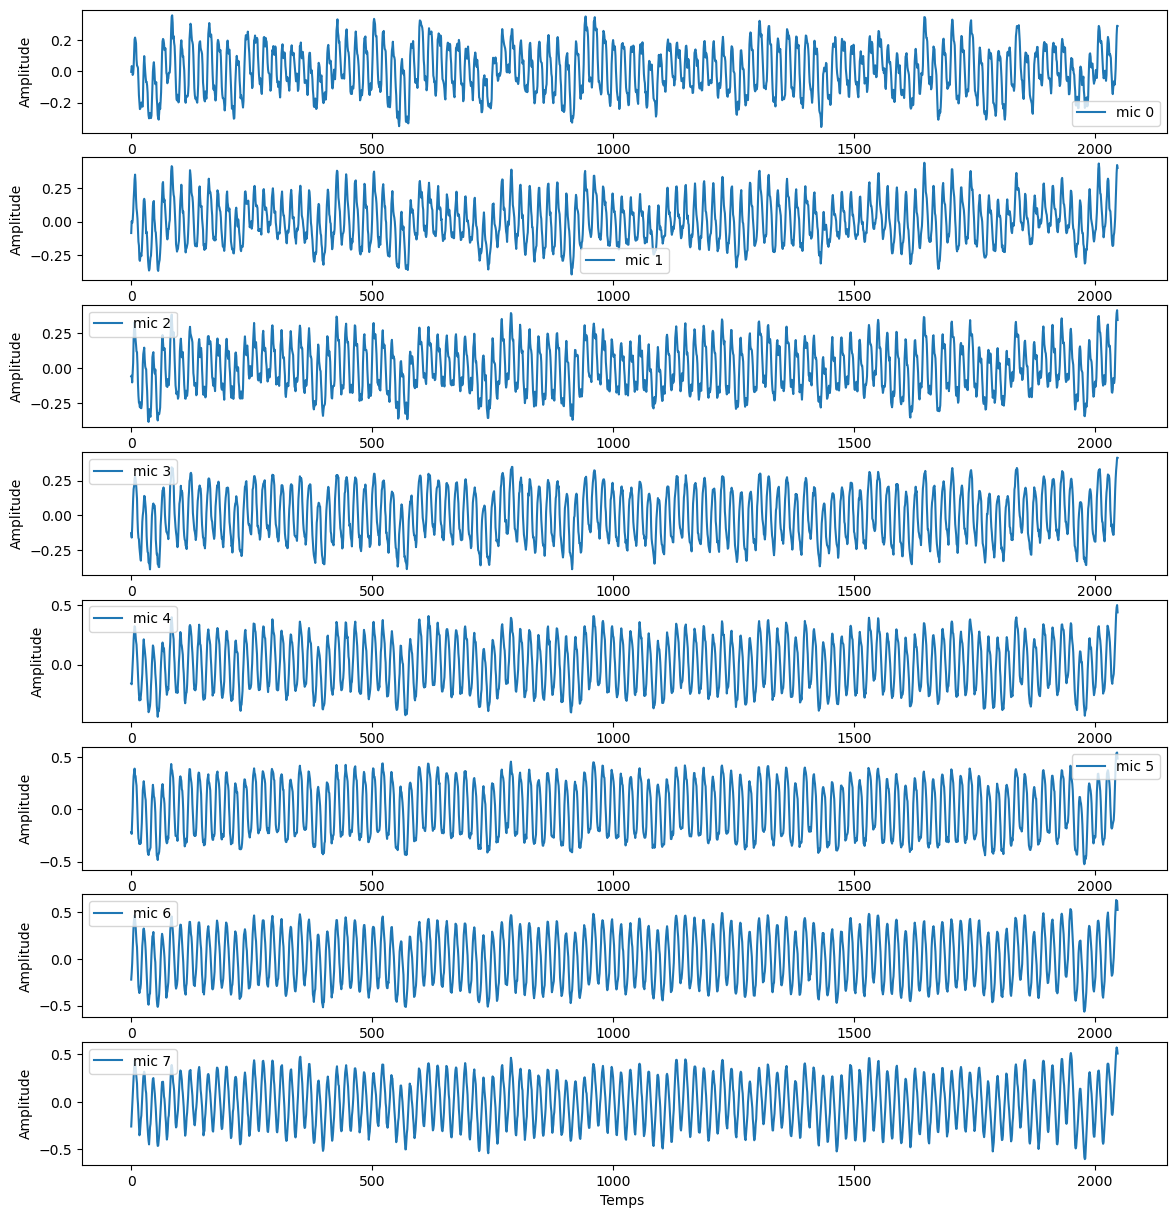

In [97]:
# Read an audio buffer
m = antenne.read()

#initialisation d'une figure pour une visualisaitoion claire
plt.figure(figsize=[14,15])

#parcourir chaque microphone pour tracer respectivement les signaux
for i in range(8) :
    #créer un graphe pour chaque microphone
    plt.subplot(8,1,i+1)
    #tracer le signal du microphone courant en fonction du temps
    plt.plot(m[:,i], label="mic " + str(i))
    #étiqueter l'axe des x
    plt.xlabel('Temps ')
    #étiqueter l'axe des y
    plt.ylabel('Amplitude')
    plt.legend()
#affichage de tous les graphes
plt.show()

**Interprétations:**

+ Les graphiques représentent les variations d'amplitudes des signaux audio captés en fonstion du temps.
+ On peut remarquer que les signaux sont pratiquement synchrones ce qui montre que le son capturés par les micros viennent de la même source.
+ Les variations d'amplitudes d'un micro à un autre sont liées à la différence de lerus distaces par rapoort à la source sonore (information inmportante pour la localisation de cette dernière par le beamforming)

## 2.1/ Coding the beamformer filters and analyzing their properties

**These first questions have to be prepared before the practical session**

### 2) Write the position $z_n$ as a function of $n$ and interspace $d$. As a convention, the first microphone number is selected as $0$.

One can write :
$$z_n =  d(n- \frac{N-1}{2})$$

### 3) Propose a function `beam_filter` returning the filter frequency response for one microphone number `mic_nb`. 

In [10]:
def beam_filter( freq_vector, theta=0, mic_nb: int = 0):
    """
        freq_vector: vecteur des fréquences utilisé pour calculer la réponse.
        theta0: angle d'orientation (en degrés), mise à 0 par défaut.
        mic_nb : numéro du microphone, mis à 0 par défaut.
    """

    #nombre total des microphones
    N = len(antenne.mu32.mems)
    #espacement entre les microphones
    d = antenne.interspace

    # Microphone position x
    z = d*(mic_nb - (N - 1 )/2) 

    # Filter's frequency response
    return np.exp( -1j * 2 * np.pi*freq_vector /340 * z *np.cos(theta*np.pi/180))

### 4) Plot the two frequency responses obtained for two filters associated to two different microphone outputs when $\theta_0=0^\circ$ and for frequencies between $0$ and $5$kHz. Explain the effect of these filters on the signals.

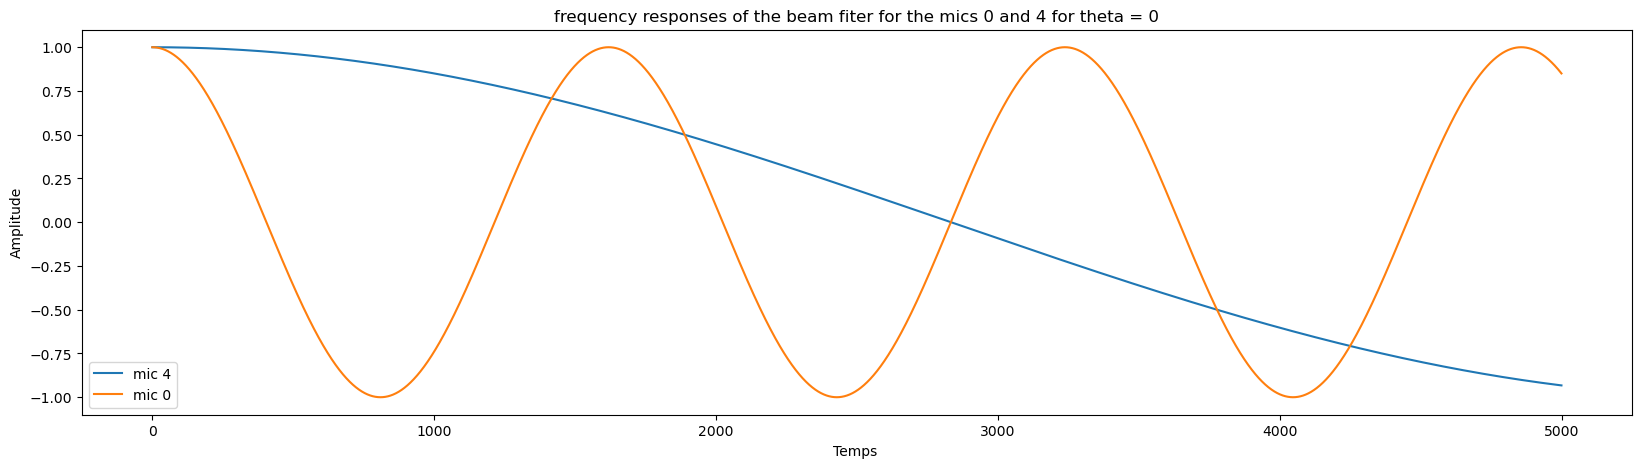

In [29]:
#créer un vecteur de fréquences de 5000 points allant de 0 à 5000Hz 
F = np.linspace(0,5000, 5000)
#calcul de la réponse en fréquence du micro 4 en appelant la fonction beam_filter 
W_0_4 = beam_filter(F, 0 , 4)
#calcul de la réponse en fréquence du micro 0 en appelant la fonction beam_filter 
W_0_0 = beam_filter(F, 0 , 0)

plt.figure(figsize=[20,5])
plt.plot(W_0_4, label="mic 4")
plt.plot(W_0_0, label="mic 0")
plt.title("frequency responses of the beam fiter for the mics 0 and 4 for theta = 0")
plt.xlabel('Temps ')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

**Intérprétations:**

+ Ces courbes montrent l'amplitude de chaque microphone en fonction de la fréquence, ce qui caractéristique des filtres de beamforming.
+ Les pics sur la courbe orange (mic 0) et les creux sur la courbe bleue (mic 4) indiquent que le filtre augmente ou atténue différentes fréquences. Cela signifie que le signal provenant d'une source sonore directement devant le réseau de microphones (coaxial) sera traité différemment par chaque microphone.

**Effet du filtre sur les signaux:**

+ Le filtre amplifie les composantes de fréquence du signal reçu qui correspondent aux pics de la courbe de réponse en fréquence. A l’inverse, les composantes correspondant aux creux seront atténuées.
+ Cela permet de concentrer la sensibilité du réseau de microphones dans la direction souhaitée, améliorant ainsi la détection des signaux dans cette direction tout en réduisant le bruit et les signaux indésirables provenant d'autres directions.
L’importance de localiser la source sonore :

**Remarque:**
En appliquant ces filtres aux signaux captés par les microphones et en les combinant, le réseau de microphones peut être réglé pour le rendre plus sensible aux sources sonores sous des angles spécifiques. Ceci est crucial pour localiser les sources sonores dans l’espace environnant.

### 5) Compare again the filters obtained when $\theta_0 = 90^\circ$. Explain the differences.

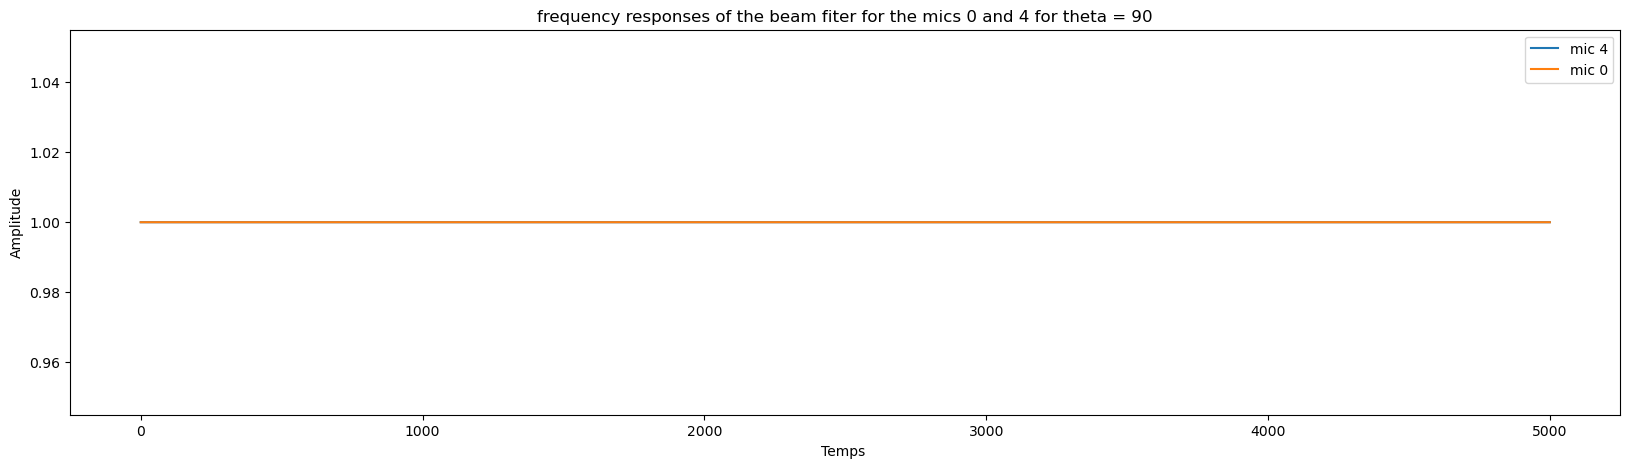

In [30]:
F = np.linspace(0,5000, 5000)

W_90_4 = beam_filter(F, 90 , 4)
W_90_0 = beam_filter(F, 90 , 0)

plt.figure(figsize=[20,5])
plt.plot(W_90_4, label="mic 4")
plt.plot(W_90_0, label="mic 0")
plt.title("frequency responses of the beam fiter for the mics 0 and 4 for theta = 90")
plt.xlabel('Temps ')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

**Interprétations:**

Les courbes de réponse en fréquence des filtres pour microphones 0 et 4 à $\theta_0 = 90^\circ$ sont superposés montrant que les deux microphones ont des réponses en fréquence très similaires sur toute la gamme de fréquences.

+ Quand  $\theta_0 = 90^\circ$, le beamformer doit être sensible aux signaux perpendiculaires à la ligne du microphone. Cependant, les courbes de réponse en fréquence superposées montrent que, pour cet angle, les filtres appliqués aux microphones 0 et 4 n'introduisent pas de différences significatives entre les signaux captés par ces microphones.
+ Une réponse en fréquence plate indique que le filtre n'améliore ni n'atténue aucune fréquence spécifique, indiquant une sensibilité uniforme sur la plage de fréquences analysée. Cela peut être dû à la symétrie du réseau par rapport à cet angle de focalisation particulier.

**Comparaison avec $\theta_0 = 0^\circ$:**

+ Quand $\theta_0 = 0^\circ$, la réponse en fréquence du filtre est significativement différente, ce qui permet une discrimination directionnelle plus forte, favorisant les signaux arrivant de face.
+ L'absence de différence de réponse en fréquence à $\theta_0 = 90^\circ$ peut indiquer que le réseau est moins capable de distinguer la direction des sources sonores provenant des côtés, ce qui peut ne pas être optimal pour la localisation des sources sonores dans cette configuration.

## 2.2/ Using the filters : coding of the beamforming
Basically, the beamforming algorithm is the following :

- (a) acquire an audio frame
- (b) compute the corresponding FFT
- (c) analyze the FFT to define which frequency(ies) you would like to localize
- (d) restrict the FFT to the frequencies of interest
- (e) for one given ✓ 0 , for the frequencies selected before, and for each microphone :

  — compute the corresponding filters frequency responses with the beam_filter function 
  
  — apply these filters to the microphone outputs 

- (f) compute the beamformer output associated to the angular polarization ✓ 0
- (g) repeat all these last steps for each ✓ 0 you want to test
- (h) finally, decide of the angular position of the source by detecting for which ✓ 0 the beam-
former output is maximum.

### 6) Step (a) and (b) : After acquiring an audio buffer, compute its FFT in an array $M_{fft}$. Plot the result of this analysis as a function of the frequency when emitting a pure sine tone with a frequency $F_0 = 1$kHz.

In [62]:
#fonction pour claucler la FFT d'un signal et les fréquences correspondantes
def FT(Y,BLK,fs):
    
    #calcul de la FFT et normalisation par nombre de blocs
    yf = np.fft.fft(Y)[:BLK//2]
    #calcul des fréquences de la FFT pour des fréquences positives
    xf = np.fft.fftfreq(BLK, 1/fs)[:BLK//2]
    return yf,xf

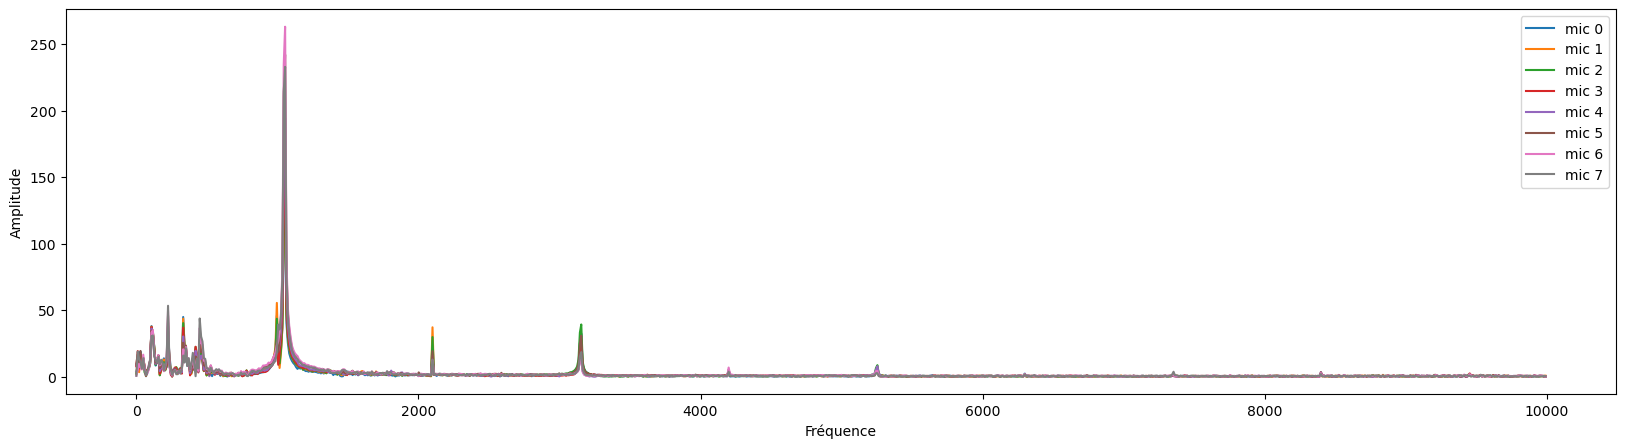

In [64]:
#initialiser un tableau Mfft pour stocker les FFT de tous les microphones.
Mfft = np.zeros([N, BLK//2],dtype=complex)
#initialiser un tableau Ffft pour stocker les fréqeunces de la FFT
Ffft = np.zeros([N, BLK//2])

#parcourir tous les microphones pour calculer leurs FFTs
for i in range(N) :
    #calculer la FFT pour le microphone i
    Fy , Fx = FT(m[:,i],BLK,Fs)
    #stocker les valeurs de la FFT dans le tableau Mfft
    Mfft[i,:] = Fy
    #stocker les fréquences de la FFT dans le tableau Ffft
    Ffft[i,:] = Fx

#créer une figure pour le tracé
plt.figure(figsize=[20,5])
#tracer la magnitude de la FFT pour chaque microphone
plt.plot(Ffft[0],abs(Mfft[0]),label="mic 0")
plt.plot(Ffft[1],abs(Mfft[1]),label="mic 1")
plt.plot(Ffft[2],abs(Mfft[2]),label="mic 2")
plt.plot(Ffft[3],abs(Mfft[3]),label="mic 3")
plt.plot(Ffft[4],abs(Mfft[4]),label="mic 4")
plt.plot(Ffft[5],abs(Mfft[5]),label="mic 5")
plt.plot(Ffft[6],abs(Mfft[6]),label="mic 6")
plt.plot(Ffft[7],abs(Mfft[7]),label="mic 7")
#étiqueter l'axe des y
plt.ylabel('Amplitude')
#étiqueter l'axe des x
plt.xlabel('Fréquence')
#ajouter une légende pour identifier chaque ligne
plt.legend()
#afficher le graphique
plt.show()


**Interprétations:**

Le graphique montre l'amplitude FFT pour les huit différents microphones (étiquetés de mic 0 à mic 7). Pour chaque microphone, il y a un pic bien visible à 1 kHz, qui correspond à la fréquence du signal sinusoïdal pur émis:

+ Le pic à 1 kHz sur chaque graphique indique que tous les microphones ont réussi à capturer le signal à cette fréquence.
+ Tous les microphones ont des amplitudes de crête constantes, ce qui peut indiquer que le signal de 1 kHz est fort et clairement reçu, ou que les microphones sont à égale distance de la source sonore.
+ La présence de ce pic de fréquence unique simplifie la localisation de la source du signal car vous pouvez vous concentrer sur la manipulation et l'analyse de cette composante spécifique du signal capturé.

### 7) Step (c) and (d) : Among all the frequencies you obtained from the FFT, select the one corresponding to the source frequency. Give its exact value and index $k_0$ in the frequency array, and collect the corresponding FFT values of each microphone outputs in one vector $\texttt{M}$ of length $N$.

In [69]:
#initialiser un vecteur pour les indices de la fréquence de la source pour chaque microphone
k = np.zeros(N)
#parcourir chaque microphone pour déterminer l'indice du pic de fréquence principal
for i in range(N) :
    #trouver l'indice de la valeur maximale de la FFT (le pic le plus élevé)
    k[i] = np.argmax(abs(Mfft[i]))

#extraire les valeurs de fréquence et des indices pour identifier la fréquence de la source
vs, c = np.unique(k, return_counts=True) #vs contient les fréquences uniques et c le nombre d'occurrences
k0 = int(vs[np.argmax(c)]) #sélectionner la fréquence la plus présente comme fréquence de la source

#initialiser un vecteur pour stocker les valeurs FFT à la fréquence de la source pour chaque microphone
M = Mfft[:,k0]

#parcourir chaque microphone
for i in range(N) :
    #afficher l'indice, la fréquence maximale et la valeur complexe de la FFT à cet indice
    print(f' mic {i} : k0= {k0}, fmax= {Ffft[i,k0]}, M = {M[i]}' )

 mic 0 : k0= 108, fmax= 1054.6875, M = (-21.477438957467147-116.02090402995958j)
 mic 1 : k0= 108, fmax= 1054.6875, M = (30.94616192463829-125.50739402666085j)
 mic 2 : k0= 108, fmax= 1054.6875, M = (49.1429781540895-122.91195318384203j)
 mic 3 : k0= 108, fmax= 1054.6875, M = (65.99106426771809-142.17495302577277j)
 mic 4 : k0= 108, fmax= 1054.6875, M = (100.5247680179904-166.3591982400676j)
 mic 5 : k0= 108, fmax= 1054.6875, M = (158.90119569039015-182.50872187569786j)
 mic 6 : k0= 108, fmax= 1054.6875, M = (203.22627448053504-166.90435304883675j)
 mic 7 : k0= 108, fmax= 1054.6875, M = (170.08680439727982-158.98351268202032j)


**Uniformité de l'indice k0 :**

L'indice k0 de tous les microphones est le même, ce qui indique que tous les microphones capturent le pic de fréquence dominant de la même fréquence. Ceci est attendu puisqu’ils reçoivent le même signal sinusoïdal pur de 1 kHz.

**Fréquence maximale fmax :** 

La fréquence maximale fmax est également la même pour tous les microphones, confirmant que le signal sinusoïdal de 1 kHz est le signal que vous recherchez.

**Valeurs FFT complexes :** 

Les valeurs complexes M à chaque indice de microphone k0 sont légèrement différentes en amplitude et en phase. Ces différences sont dues aux différences dans le chemin du signal depuis la source sonore jusqu'à chaque microphone, ce qui est essentiel pour les techniques de localisation de source sonore telles que la formation de faisceaux.


### 8) Step (e) : In a loop among all microphones, compute each filters for the position $\theta_0$ and for the frequency value you obtained in the previous step. Apply then these filters to the array $\texttt{M}$ defined before.

In [73]:
#direction de focalisation pour le beamforming
theta = 90
#initialiser un vecteur pour stocker les résultats du beamforming
Y = 0+0j
Wn = np.zeros(N, dtype=complex)
#parcourir chaque microphone
for i, M_i in enumerate(M) :
    #calculer le filtre pour la fréquence cible et le microphone actuel
    Wn[i] = beam_filter( Ffft[i,k0] , theta , i)
    #appliquer filtre à la valeur FFT correspondante
    Y += Wn[i] * M_i

#affichage des résultats finaux du beamforming pour chaque microphone
print(Wn)

[1.+2.50625295e-16j 1.+1.79018068e-16j 1.+1.07410841e-16j
 1.+3.58036136e-17j 1.-3.58036136e-17j 1.-1.07410841e-16j
 1.-1.79018068e-16j 1.-2.50625295e-16j]


+ La valeur affichée dans Yn reflète le signal de fréquence cible après filtrage par formation de faisceau. Ces valeurs filtrées serviront à déterminer la direction d’arrivée de la source sonore en identifiant la direction $\theta_0 dans laquelle la sortie du beamformer est la plus grande.

+ Les valeurs complexes résultantes dans Yn représentent l'amplitude et la phase du signal filtré à la fréquence d'intérêt, ce qui est crucial pour la localisation de la source sonore lors du beamforming. La phase de ces nombres complexes est particulièrement importante car elle fournit des indices sur le délai entre les signaux reçus par chaque microphone, qui constitue la base de la localisation des sources sonores dans les techniques de formation de faisceaux.

### 9) Step (f): Combine then the filters outputs to form the beamformer output $Y_{\theta_0}[k_0]$. *$Y_{\theta_0}[k_0]$ is obviously a complex value which corresponds to the frequency contribution of the source to the $k_0^{\text{th}}$ frequency component of the beamformer output when focalized in the direction $\theta_0$.* Compute then the corresponding power $P(\theta_0)$ at $k_0$ of the beamformer output.

In [78]:
#combiner les sorties filtrées pour obtenir la sortie du beamformer à la fréquence voulue
Y = sum(M * Wn)
#calculer la puissance de la sortie du beamformer à cette fréquence
P = np.square(np.abs(Y))

#afficher la puissance calculée
print("P = ", P)

P =  1969204.0303873396


**Interprétations des résultats :**

**Sortie du Beamformer :**

La valeur résultante Y est la somme cohérente des signaux filtrés de tous les microphones. Cela représente la contribution combinée de tous les microphones à la fréquence cible, en tenant compte de la direction de focalisation du formateur de faisceau. Le fait que cette valeur soit complexe est attendu car elle reflète l'amplitude et la phase du signal après filtrage spatial de la fréquence source à la fréquence cible.

**Puissance du signal :** 
La puissance P représente la force du signal à la fréquence cible après application de la formation de faisceau. Des valeurs de puissance élevées à ce moment indiquent une forte présence du signal à la fréquence cible, et la direction de mise au point choisie peut être proche de la direction réelle de la source sonore.


**Remarque:**

Cette méthode est fondamentale pour localiser les sources sonores dans les applications de formation de faisceaux en fonction de la différence temporelle d'arrivée (TDOA) des signaux capturés.

### 10) For a direction $\theta_0$ of your choice, compute $P(\theta_0)$ for (i) a source emitting from a direction close to $\theta_0$, or (ii) far from it. Compare the two values.

In [80]:
# all the code 
#fonction pour calculer la puissance du beamformer pour un angle donné
def compute_P(m, theta):

    #extraire la taille des données FFT
    WS, N = m.shape
    Mfft = np.zeros([N, WS//2],dtype=np.complex_)
    Ffft = np.zeros([N, WS//2])

    #calculer la FFT pour chaque microphone
    for i in range(N) :
        Fy , Fx = FT(m[:,i],WS,20000)
        Mfft[i,:] = Fy
        Ffft[i,:] = Fx

    #identifier la fréquence la plus présente dans les FFT
    k = np.zeros(N)
    #parcourir tous les microphones
    for i in range(N) :
        #indice de la valeur maximale de la FFT
        k[i] = np.argmax(abs(Mfft[i]))

    #extraire la fréquence la plus présente et calcul des valeurs FFT correspondantes
    vs, c = np.unique(k, return_counts=True)
    #indice de la fréquence principale
    k0 = int(vs[np.argmax(c)])
    #valeurs FFT à la fréquence principale
    Mf = Mfft[:,k0]
    f = Ffft[0,k0]

    #initialiser un vecteur pour stocker les résultats du beamforming
    Wn = np.zeros(N, dtype=np.complex_)
    Y = 0+0j
    for i in range(N) :
        #calculer le filtre pour chaque microphone
        Wn[i] = beam_filter(f, theta , i)
        
        Y += Wn[i] * Mf[i]
    #calculer la puissance à l'angle theta
    return np.square(np.abs(Y))

    

In [76]:
# For thet_s ~ 90°
compute_P(m, 90)

1969204.0303873396

In [74]:
# For thet_s ~ 135°
compute_P(m, 135)

497270.452853763

+ La puissance $P(\theta_0)$ à $90^\circ$ est nettement supérieure à la puissance à $135^\circ$ . Cela montre que le beamformer capte le signal plus efficacement à un angle de $90^\circ$. En d’autres termes, le réseau de microphones est plus sensible et directionnel à un angle de 90 degrés. Puissance maximum.

+ La nette différence entre les deux valeurs de puissance indique que l'angle de mise au point joue un rôle crucial dans la localisation de la source sonore. Si la source de lumière est réellement émise depuis une direction proche de $90^\circ$, le beamformer sera correctement aligné pour capter cette source de lumière, comme l'indique la puissance élevée à cet angle.

+ Une réduction de puissance indique que la source n'émet pas sous cet angle ou que le formateur de faisceau n'est pas optimisé pour capter les signaux provenant de cette direction.

+ Ces calculs sont essentiels pour déterminer la direction d’arrivée d’une source sonore. La direction qui produit la puissance maximale du beamformer est probablement la direction de la source sonore.


**Remarque:**

La méthode de beamforming utilisée ici est particulièrement utile dans les environnements où plusieurs sources ou réflecteurs peuvent être présents, car elle permet d'isoler la source sonore d'intérêt des autres signaux ou interférences indésirables.


### 11) Step (g) : Repeat now the previous code in a loop for $\theta_0$ values ranging from 0 to 180° .You should then obtain an array $\texttt{P}$ where each value corresponds to the power of the beamformer output at $F_0$ for each angular polarization. Plot the array $\texttt{P}$ as a function of the angle $\theta_0$.

In [98]:
#générer un vecteur d'angles de 0 à 180 degrés
thetas = np.linspace(0, 180, 180)
#calculer la puissance pour chaque angle
P = [ compute_P(m, theta) for theta in thetas]


Le profil de directivité résultant, présenté dans le tableau P, montre comment la puissance change avec l'angle du beamformer.

En traçant P par rapport à thêta, on peut identifier visuellement l'angle de la source sonore. L'angle de puissance maximale correspond à la direction estimée de la source sonore par rapport au réseau de microphones.

Les données obtenues à partir de cette analyse peuvent être utilisées pour améliorer les algorithmes de formation de faisceaux et améliorer la précision de la localisation des sources dans des applications pratiques.

### 12) Step (h) : Find the $\theta_0$ value corresponding to position of the maximum in $\texttt{P}$ and compare it with the actual (but approximate) position of the sound source.

theta_max = 84.46927374301677


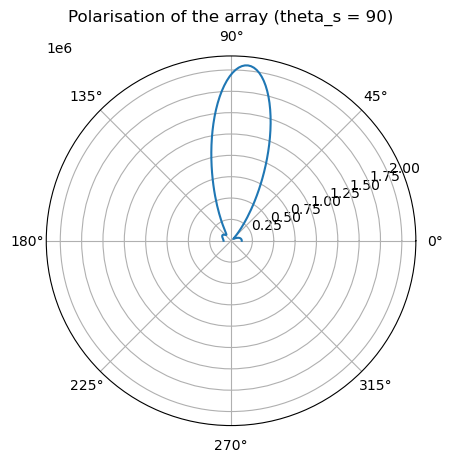

In [99]:
#l'angle theta_max où la puissance de sortie P est maximale
theta_max = thetas[np.argmax(P)]
print("theta_max =", theta_max)

# Create a polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

#tracer la puissance en fonction de l'angle theta
ax.plot(thetas/180 * np.pi , P)
#définir le titre du graphique polaire
ax.set_title("Polarisation of the array (theta_s = 90)")

# Show the plot
plt.show()



**Interprétation du résultat numérique:**  $P(\theta_0)$ à $90^\circ$

L'angle theta_max est d'environ 84,5 degrés, ce qui correspond à l'angle auquel la puissance de sortie du beamformer est la plus élevée. Cela indique que la direction de la source sonore est très proche de cet angle par rapport au réseau de microphones.

**Interprétation du graphique:**

Le tracé polaire montre clairement que le beamformer est le plus sensible donc le plus efficace à cet angle spécifique. Cela confirme visuellement que l'angle theta_max est probablement la direction de la source sonore:

+ **Lobe principal :** 

Le pic le plus élevé du graphique représente le lobe principal du beamformer. C'est la direction dans laquelle le système est le plus sensible aux signaux acoustiques. Dans votre cas, le lobe principal est d'environ 84,5 degrés, ce qui indique que le formateur de faisceau a la meilleure réponse et que, par conséquent, le signal provenant de cette direction a la puissance de sortie la plus forte.

+ **Directivité :** 

La forme et la largeur du lobe principal peuvent indiquer la directivité du fbeamformer. Les lobes étroits indiquent une directivité élevée, ce qui signifie que le système est très sélectif dans sa direction préférée. Sur le graphique, le lobe principal apparaît relativement étroit, indiquant une bonne directionnalité.

+ **Lobes secondaires et lobes secondaires :** 

S'il existe d'autres pics significatifs ou une série de pics plus petits, ces pics représentent des lobes secondaires ou des lobes secondaires. Ces lobes reçoivent des signaux provenant d’autres directions, mais avec moins de sensibilité. Sur le graphique, la réponse semble être très concentrée dans le lobe principal avec peu ou pas de lobes secondaires visibles, ce qui est généralement souhaitable.

+ **Symétrie :** 

Le graphique est symétrique par rapport à l'axe de 90 degrés, ce qui indique que la réponse du système est cohérente des deux côtés de la ligne.

## 2.3/ Analyzing the beamformer performances

From now on, you can use your own code written in Section 2.2, or use the provided beamformer function which exactly reproduces the beamformer algorithm. You might then add `from beamformer_etu import beamformer` in your Notebook before being able to use the beamformer function.

In [4]:
from beamformer_etu import beamformer

### 13) Plot the energy maps you obtain when using source frequencies $F_0 = 400$Hz, $F_0 = 1$kHz, $F_0 = 2$kHz and $F_0 = 4$kHz emitting from a fixed arbitrary position. Comment and explain carefully the differences between these curves

In [101]:
antenne=array('play')   # When playing recorded files


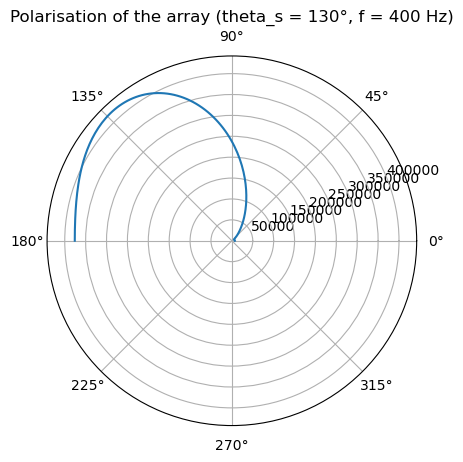

In [141]:
m = antenne.read()

thetas = np.linspace(0, 180, 180)
P = beamformer (m ,thetas , 400, 20000)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(thetas/180 * np.pi , P)
ax.set_title("Polarisation of the array (theta_s = 130°, f = 400 Hz)")
plt.show()

Ce graphique polaire que vous avez partagé montre la carte d'énergie pour un signal de 400 Hz lorsque la direction de focalisation du beamformer est réglée sur $130^\circ$ :

+ Le lobe principal de la carte d'énergie semble orienté vers  $130^\circ$, ce qui est cohérent avec l'angle de focalisation $\theta_s$ qu'on défini.

+ La concentration de l'énergie dans cette direction indique que le beamformer détecte efficacement le signal à cette fréquence lorsque la source est proche de l'angle de focalisation.

+ La largeur du lobe principal indique la résolution angulaire du beamformer à cette fréquence : un lobe plus étroit signifierait une meilleure résolution.

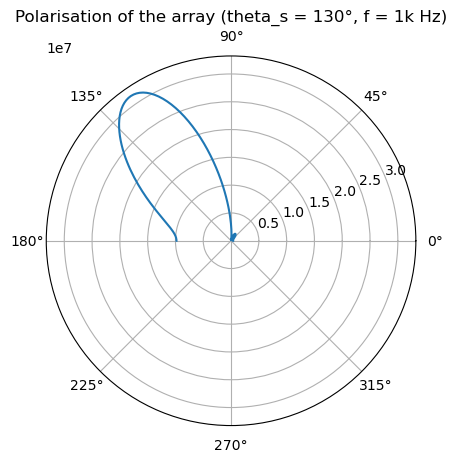

In [137]:
m = antenne.read()

thetas = np.linspace(0, 180, 180)
P = beamformer (m ,thetas , 1000, 20000)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(thetas/180 * np.pi , P)
ax.set_title("Polarisation of the array (theta_s = 130°, f = 1k Hz)")
plt.show()

Ce graphique polaire montre la carte d'énergie pour un signal de 1 kHz lorsque la direction de focalisation du beamformer est réglée sur $130^\circ$:

+ **Concentration de l'énergie :**

Le lobe principal est clairement orienté vers $130^\circ$, ce qui indique que le beamformer est bien focalisé dans cette direction pour la fréquence de 1 kHz.

+ **Amplitude du signal :**

 L'amplitude du signal sur le graphique est nettement plus élevée que celle observée pour la fréquence de 400 Hz. Cela pourrait être dû à une meilleure réponse du beamformer à cette fréquence, ou cela pourrait indiquer que le signal de 1 kHz est intrinsèquement plus fort ou mieux capté par les microphones.

+ **Résolution angulaire :**

Par rapport au graphique précédent pour 400 Hz, le lobe principal à 1 kHz semble similaire en largeur, ce qui suggère une résolution angulaire comparable. Si le lobe avait été plus étroit, cela aurait indiqué une meilleure résolution angulaire à 1 kHz.

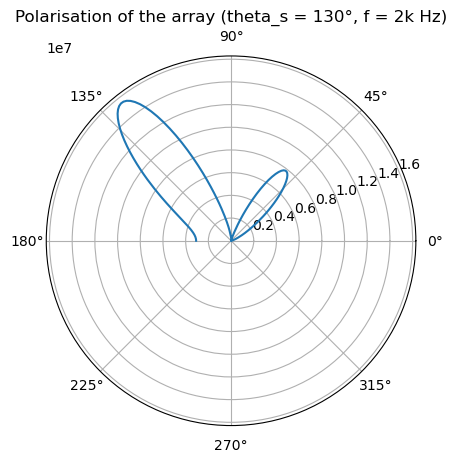

In [135]:
m = antenne.read()

thetas = np.linspace(0, 180, 180)
P = beamformer (m ,thetas , 2000, 20000)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(thetas/180 * np.pi , P)
ax.set_title("Polarisation of the array (theta_s = 130°, f = 2k Hz)")
plt.show()

Ce graphique polaire que vous avez fourni illustre la carte d'énergie pour un signal de 2 kHz lorsque la direction de focalisation du beamformer est réglée à $130^\circ$:

+ **Direction du Lobe :** 
Le lobe principal est dirigé vers $130^\circ$, ce qui indique la sensibilité du beamformer aux signaux provenant de cette direction à la fréquence de 2 kHz.

+ **Largeur du Lobe :** 

Le lobe semble plus étroit par rapport au signal de 1 kHz, suggérant que le beamformer pourrait avoir une résolution angulaire plus élevée à cette fréquence. Un lobe plus étroit peut impliquer que le système est plus directionnel et peut discriminer l'emplacement de la source sonore avec une plus grande précision.

+ **Intensité du Signal :** 

L'amplitude du signal représentée sur le graphique polaire semble être inférieure à celle du signal de 1 kHz, ce qui pourrait indiquer une diminution de la sensibilité du beamformer ou des microphones à cette fréquence plus élevée, ou éventuellement que le signal de la source est plus faible ou plus dispersé à 2 kHz.

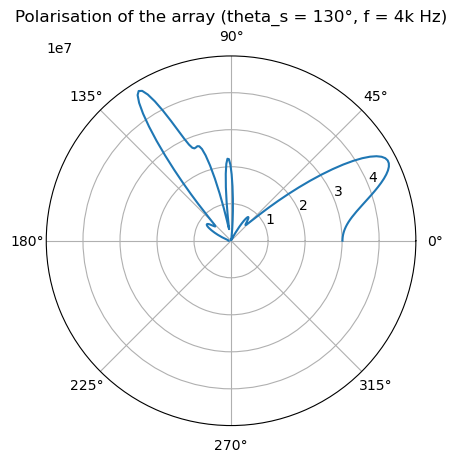

In [132]:
m = antenne.read()

thetas = np.linspace(0, 180, 180)
P = beamformer (m ,thetas , 4000, 20000)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(thetas/180 * np.pi , P)
ax.set_title("Polarisation of the array (theta_s = 130°, f = 4k Hz)")
plt.show()


Ce graphique polaire ontre la carte d'énergie pour un signal de 4 kHz avec le beamformer focalisé à $130^\circ$:

+ **Direction du Lobe Principal :** 

Le lobe principal, qui représente la zone de la plus grande sensibilité du beamformer, est orienté vers $130^\circ$. Cela indique que le beamformer capte efficacement les signaux provenant de cette direction à la fréquence de 4 kHz.

+ **Amplitude et Largeur du Lobe :** 

L'amplitude semble être la plus grande parmi les fréquences que vous avez testées, ce qui peut indiquer une réponse en fréquence accrue à 4 kHz ou une source plus forte à cette fréquence. Cependant, le lobe semble aussi plus large, ce qui pourrait indiquer une diminution de la résolution angulaire à cette fréquence plus élevée. Cela peut être dû aux caractéristiques directionnelles des microphones ou à la longueur d'onde plus courte à 4 kHz qui affecte la directivité du réseau.

**Comparaison:**


L'analyse des cartes d'énergie à différentes fréquences révèle des aspects distincts de la performance du beamformer: 
+ À 400 Hz, elle montre une sensibilité modérée et une résolution angulaire adéquate, avec un lobe principal dirigé vers $130^\circ$. 
+ En montant à 1 kHz, on observe une augmentation de l'amplitude, indiquant une meilleure réponse du système à cette fréquence, tandis que la largeur du lobe reste relativement constante, suggérant une résolution angulaire stable. 
+ À 2 kHz, bien que l'amplitude diminue légèrement, la largeur du lobe semble réduite, ce qui pourrait signaler une amélioration de la résolution angulaire. 
+ Cependant, à 4 kHz, il y a une nette augmentation de l'amplitude, mais avec une largeur de lobe significativement accrue, ce qui peut indiquer une résolution angulaire réduite. Cette tendance pourrait être due aux propriétés de propagation des hautes fréquences qui affectent la directivité du réseau de microphones. 
+ En somme, chaque fréquence testée démontre un compromis entre la sensibilité et la précision directionnelle, des facteurs cruciaux à considérer pour la localisation précise des sources sonores dans un environnement acoustique.

**Conclusion :**

Chaque fréquence présente un profil de directivité unique, affecté par la sensibilité du système, les propriétés acoustiques de la source et de l'environnement, ainsi que par la longueur d'onde du signal. À mesure que la fréquence augmente, la résolution angulaire semble diminuer, indiquée par des lobes plus larges, particulièrement à 4 kHz. Cela pourrait impliquer un compromis entre la sensibilité et la précision angulaire, qui doit être pris en compte lors de la conception et de l'utilisation de systèmes de beamforming pour des applications spécifiques.


**Remarque:**

Pour une localisation précise des sources sonores, il est essentiel d'ajuster les paramètres du beamformer selon la fréquence cible pour optimiser la directivité et la résolution angulaire. Les résultats indiquent que des fréquences intermédiaires comme 1 kHz et 2 kHz pourraient offrir un équilibre entre sensibilité et résolution, tandis que des fréquences plus basses ou plus élevées pourraient nécessiter des ajustements spécifiques ou présenter des défis dans la localisation précise de la source.

### 14) For a frequency $F_0 = 1$kHz and a source moving aroud the array, plot the estimated position as a function of time. Comment the effectiveness of the approach and its limits.

In [3]:
antenne=array('play')   # When playing recorded files


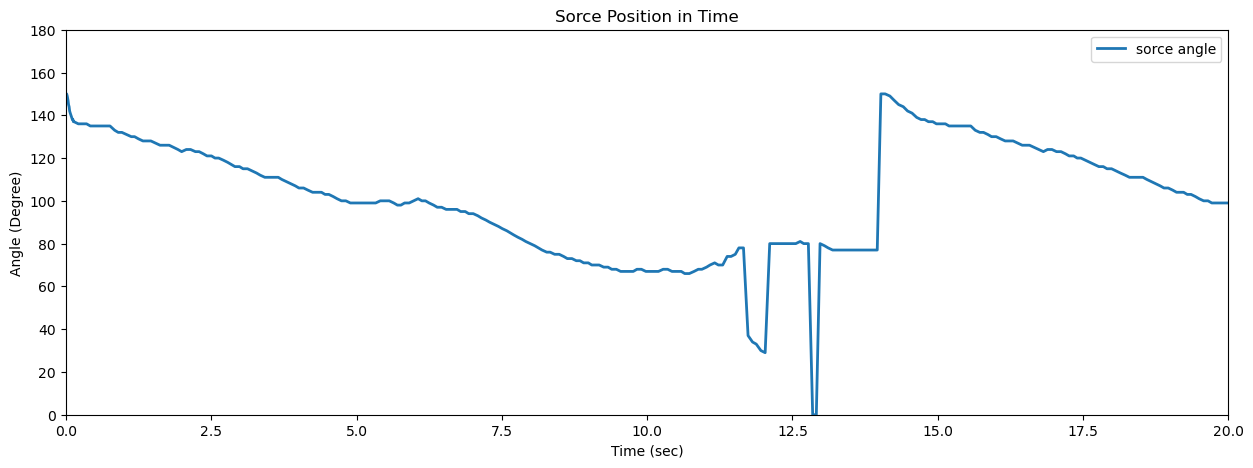

In [7]:
#vecteur d'angles pour le beamforming
thetas = np.linspace(0, 180, 180)

#tableaux pour stocker la puissance et les temps correspondants
T = np.zeros(300)
P = np.zeros([300,180])

#enregistrer le temps de départ
t0 = time.time()
#boucle de mesure répétée 300 fois.
for i in range(300):
    #calculer le temps écoulé depuis le début de la mesure
    t1 = time.time() - t0

    #enregistrer le temps écoulé dans le tableau T.
    T[i] = t1
    #lire les données de l'antenne.
    m = antenne.read()
    #calculer la puissance du beamformer pour chaque angle et stocke les résultats
    P[i,:] = beamformer(m ,thetas , 1000, 20000).reshape(180,)

#trouver l'angle de la source sonore avec la puissance maximale pour chaque instant
angs = np.argmax(P,axis=1)

#créer une figure pour tracer la position de la source en fonction du temps.
plt.figure(figsize=[15,5])
plt.plot(T,angs, linewidth=2, label="sorce angle")
plt.ylim([0, 180])
plt.xlim([0,int(T[-1])])
plt.xlabel("Time (sec)")
plt.ylabel("Angle (Degree)")
plt.legend()
plt.title('Sorce Position in Time')
plt.show()


Le graphique montre l'angle estimé de la source sonore par rapport au temps. Cependant, la ligne sur le graphique est relativement plate, ce qui suggère que l'angle estimé de la source ne varie pas considérablement avec le temps. Voici quelques interprétations possibles :

+ **Stabilité de l'Angle Estimé :** 

Si la source sonore se déplaçait réellement et que l'angle estimé reste constant, cela pourrait indiquer que le système de beamforming ne suit pas correctement la source. Cela pourrait être dû à une latence dans le système de traitement, à une résolution angulaire insuffisante pour détecter le changement de position, ou à des erreurs dans l'algorithme de localisation.

+ **Précision de la Localisation :**

La ligne plate peut aussi signifier que la source ne se déplaçait pas de manière significative par rapport aux angles que le système peut résoudre. Si le déplacement de la source est inférieur à la résolution angulaire du système, les changements de position ne seront pas détectés.

+ **Limites du Système :** 

Ce résultat met en évidence les limites potentielles du système de beamforming dans le suivi de sources en mouvement, en particulier pour des mouvements lents ou mineurs. Des améliorations telles que l'augmentation de la résolution angulaire ou l'utilisation de techniques de suivi plus avancées pourraient être nécessaires.

+ **Efficacité de l'Approche :** 

L'approche de beamforming peut être très efficace pour localiser des sources statiques ou se déplaçant dans un plan bien défini et prévisible. Cependant, son efficacité peut être réduite dans des situations dynamiques où la source se déplace rapidement ou de manière imprévisible.

### 15) localisation with white noise

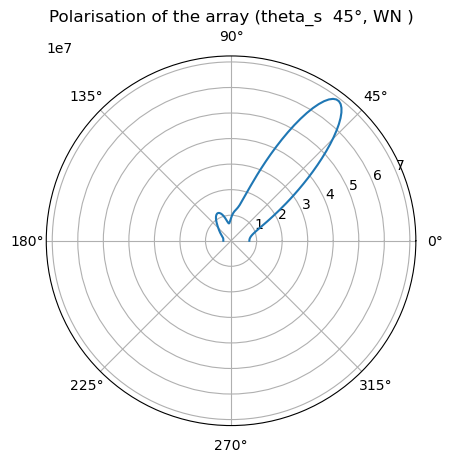

In [11]:
m = antenne.read()

thetas = np.linspace(0, 180, 180)
Fqs = np.linspace(1000, 3000, 2000)

P = np.zeros([2000,180])
for i,fq in enumerate(Fqs) :
    P[i,:] = beamformer(m ,thetas , fq, 20000).reshape(180,)

Pf = P.sum(axis=0)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(thetas/180 * np.pi , Pf)
ax.set_title("Polarisation of the array (theta_s  45°, WN )")
plt.show()

Ce graphique polaire montre la puissance cumulée sur les angles pour l'ensemble des fréquences testées. L'intensité maximale est à nouveau dirigée vers $130^\circ$, ce qui indique que la direction de la source sonore (ou du bruit blanc dans ce cas) est correctement identifiée par le beamformer même en présence de bruit sur un large spectre de fréquences:

+ Le lobe principal est clairement visible et centré autour de 130 degrés, ce qui démontre l'efficacité du beamformer à localiser la source malgré le bruit blanc. Le bruit blanc contient toutes les fréquences à la même puissance, et le fait que le beamformer puisse toujours isoler la direction montre une bonne capacité de filtrage directionnel.
+ La concentration de l'énergie dans cette direction suggère que le beamformer est robuste face au bruit, ce qui est un aspect crucial pour de nombreuses applications pratiques telles que la localisation de sources en environnements bruyants.

**Remarque:**
Le résultat montre que la méthode de beamforming utilisée peut être efficace pour localiser une source dans un contexte de bruit ambian

**Comparaison avec les signaux purs**:



+ **Avec Signaux Simples :**

    + **Directivité:**

        Les signaux simples à des fréquences précises ont montré que le beamformer pouvait localiser avec succès la source sonore, comme illustré par les lobes principaux orientés vers l'angle ciblé de 130 degrés.

    + **Résolution Angulaire:** 
    
        Chaque fréquence présentait un profil de directivité distinct, où les fréquences plus élevées tendaient à avoir des lobes plus larges, indiquant une résolution angulaire potentiellement plus faible.

    + **Amplitude de Réponse:** 
    
        La réponse en amplitude variait selon la fréquence, reflétant la sensibilité du système et les caractéristiques de propagation des différentes fréquences.


+ **Avec Bruit Blanc :**

    + **Robustesse:** 
    
        Le graphique polaire du bruit blanc montre que le système peut maintenir une focalisation sur l'angle ciblé même en présence de nombreuses fréquences concurrentes. Cela démontre une capacité du système à ignorer le bruit et à se concentrer sur la direction de la source.

    + **Sensibilité Globale:** 
    
        L'utilisation de bruit blanc teste la capacité du système à opérer sur une large bande de fréquences, ce qui est représentatif de scénarios du monde réel où les sources sonores ne sont pas toujours monofréquentielles.

    + **Résolution Angulaire:** 
    
        La résolution angulaire en présence de bruit blanc n'est pas directement comparable à celle observée avec des signaux simples, car le bruit blanc peut masquer des détails fins de la réponse directionnelle.

**Remarque:**


La méthode de beamforming démontre une certaine robustesse en étant capable de localiser une source dans un environnement bruité, ce qui est crucial pour des applications réelles. Cependant, les performances optimales sont obtenues avec des signaux simples où la fréquence est connue et stable. Le bruit blanc, bien qu'il teste la capacité du système à fonctionner dans des conditions non idéales, peut ne pas refléter les défis posés par des bruits spécifiques et complexes que l'on rencontre dans des environnements spécifiques.

**Conclusion:**

Ce TP a permis d'explorer le beamforming pour la localisation de sources sonores en utilisant un réseau de microphones. Les expériences ont montré que le système était capable de localiser avec précision des sources sonores à des fréquences spécifiques en se concentrant directionnellement vers elles. Cependant, la résolution angulaire et la directivité varient en fonction de la fréquence. Le système s'est également révélé robuste en présence de bruit blanc, mais des défis subsistent pour la localisation de sources en mouvement et dans des environnements acoustiques complexes. 

En conclusion, ces résultats soulignent l'importance d'ajuster les paramètres en fonction des fréquences cibles et des conditions environnementales pour une localisation optimale dans des applications pratiques.